In [1]:
import vs
import utils
import pandas as pd
import numpy as np
import pickle
bar2_artist_name_list = ['bach', 'scarl', 'bach', 'scarl']
music_artist_name_list = ['cond', 'auto', 'allcond', 'allcond']
bar2_ckp_list = ['07060243_bach_GRU3_L2_BatchNorm_B2G', 
                 '07060146_scarl_GRU3_L2_BatchNorm_B2G', 
                 '07060243_bach_GRU3_L2_BatchNorm_B2G', 
                 '07060146_scarl_GRU3_L2_BatchNorm_B2G']
music_ckp_list = ['07091903_cond_GRU3_L2_BatchNorm', 
                  '07100100_auto_GRU3_L2_BatchNorm', 
                  '07100344_allcond_GRU3_L2_BatchNorm',
                  '07100344_allcond_GRU3_L2_BatchNorm']
prompt_index_list = [31, 55, 31, 55]

i = 
bar2_artist_name = bar2_artist_name_list[i]
music_artist_name = music_artist_name_list[i]
bar2_ckp = bar2_ckp_list[i]
music_ckp = music_ckp_list[i]
prompt_index = prompt_index_list[i]+1

for j in range(-1, -prompt_index, -1):
    # Load Bar-2 Model
    # music_model_details: GRU_num, time_dis, bn, L2
    bar2_model_details = [3, False, True, True]
    bar2_model = vs.bar2_generation(artist_name=bar2_artist_name, epochs=600, model_details=bar2_model_details)

    # load bar1
    shape = bar2_model.model_input_data_shape
    with open('data/all_pairs_bar1_{}.pkl'.format(bar2_artist_name), 'rb') as file:
        all_prompt = pickle.load(file)
    # load ans (the entire song)
    with open('data/songs_all_pair_{}.pkl'.format(bar2_artist_name), 'rb') as file:
        all_ans = pickle.load(file)
    prompt = np.reshape(all_prompt[j][0][:shape[-2]], (-1, shape[-2], shape[-1]))

    # Generate Bar2 of the Music
    bar2_model.generate_data(sequence_num=prompt.shape[0], prompt=prompt, ans=all_ans[j], ckp_name=bar2_ckp)

    # Load Music Model
    # music_model_details: GRU_num, time_dis, bn, L2, input_note_num, seq_len, optimizer
    music_model_details = [3, False, True, True, 30, 80, 'nadam']
    music_model = vs.music_generation(artist_name=music_artist_name, epochs=700, model_details=music_model_details)

    # Generate Music
    music_model.generate_data(sequence_num=len(bar2_model.prompt), prompt=bar2_model.predictions, ans=bar2_model.prompt, ckp_name=music_ckp, prompt_type='song')

In [ ]:
import vs
import utils
import pandas as pd
import numpy as np
import pickle
bar2_artist_name_list = ['bach', 'scarl', 'bach', 'scarl']
music_artist_name_list = ['cond', 'auto', 'allcond', 'allcond']
bar2_ckp_list = ['07060243_bach_GRU3_L2_BatchNorm_B2G', 
                 '07060146_scarl_GRU3_L2_BatchNorm_B2G', 
                 '07060243_bach_GRU3_L2_BatchNorm_B2G', 
                 '07060146_scarl_GRU3_L2_BatchNorm_B2G']
music_ckp_list = ['07091903_cond_GRU3_L2_BatchNorm', 
                  '07100100_auto_GRU3_L2_BatchNorm', 
                  '07100344_allcond_GRU3_L2_BatchNorm',
                  '07100344_allcond_GRU3_L2_BatchNorm']
prompt_index_list = [31, 55, 31, 55]


In [1]:
# stat_dis for generated music
import pickle
import pandas as pd
from glob import glob
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import csv
import utils
i=0
path_list = ['generated/bach']
dataset_list = ['bach']

# Load all predicitons & generate all_words
d_rout = glob('{}/*.pkl'.format(path_list[i]))
all_words = []
for d in d_rout:
    with open(d, 'rb') as file:
        predictions = pickle.load(file)
    output_words = utils.predictions_to_words(predictions=predictions[2])
    all_words.append(output_words)

# bar_details_4f_after & song_details_4f_after
usage_list = ['song', 'bar']
for use in usage_list:
    a = pd.DataFrame({})
    dt = utils.stat_data(seq_len=180, all_words=all_words, usage=use)
    for j in dt:
        df = utils.stat_counting(data=j)
        a = a.append(df)
    a.to_csv("data_visualization/{}_details_4f_{}.csv".format(use, dataset_list[i]))

# bar_details_ave_note_per_song_after
dt = utils.stat_data(seq_len=180, all_words=all_words)
note_num = pd.DataFrame({})
for bar in dt:
    df = pd.DataFrame({'note_num': [len(bar)]})
    note_num = note_num.append(df)
note_num.to_csv("data_visualization/bar_details_ave_note_per_song_after_{}.csv".format(dataset_list[i]))

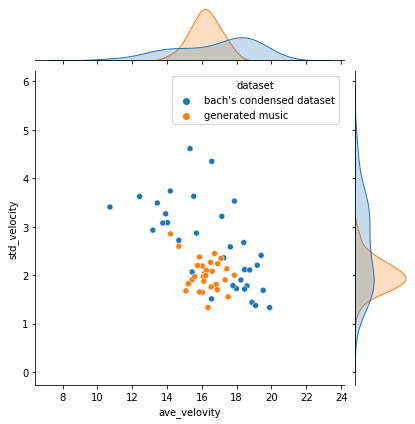

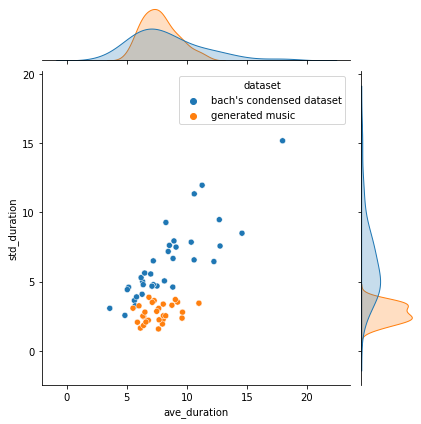

In [5]:
# plot: 4f
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
# Load data
for i in [2, 3]:
    f4 = ['pitch', 'position', 'v', 'd']
    path = 'data_visualization/'
    data = pd.read_csv(path+'song_details_{}.csv'.format(f4[i])) 

    if i==0:
        # pitch
        sns.jointplot(x = "ave_pitch", y = "std_pitch", data = data, hue="dataset")
        plt.savefig('sd_pitch_{}.jpg'.format(datetime.now().strftime("%m%d%H%M"))) 
    elif i==1:
        # position
        sns.jointplot(x = "ave_position", y = "std_position", data = data, hue="dataset")
        plt.savefig(path+'sd_position_{}.jpg'.format(datetime.now().strftime("%m%d%H%M"))) 
    elif i==3:
        # duration
        sns.jointplot(x = "ave_duration", y = "std_duration", data = data, hue="dataset")
        plt.savefig(path+'sd_duration_{}.jpg'.format(datetime.now().strftime("%m%d%H%M"))) 
    elif i==2:
        # velocity
        sns.jointplot(x = "ave_velovity", y = "std_velocity", data = data, hue="dataset")
        plt.savefig(path+'sd_velocity_{}.jpg'.format(datetime.now().strftime("%m%d%H%M"))) 